In [1]:
import matplotlib.pyplot as plt

In [2]:
from src.args import args
from src.utils import get_fixed_hyper_param, get_device, game_data_loaders, load_model, extract_features, torch2numpy

In [3]:
from src.features_extraction import VanillaVAE, VanillaVAELossFunction
from src.features_extraction import BetaVAE, BetaVAELossFunction
from src.features_extraction import WassersteinAE, WassersteinAELossFunction
from src.features_extraction import AdversarialAE, Discriminator, AAELoss

In [4]:
device = get_device()
batch_size, num_of_channels, input_size, z_dim = get_fixed_hyper_param(args['hyper_parameters'])
reg_weight = args['wasserstein_ae']['reg_weight']

In [5]:
model = WassersteinAE(z_dim, num_of_channels, input_size).to(device)
loss = WassersteinAELossFunction(reg_weight)

#### Choose the AE that u r going to use

In [6]:
#model = VanillaVAE(z_dim, num_of_channels, input_size).to(device)
#loss = VanillaVAELossFunction()

#model = WassersteinAE(z_dim, num_of_channels, input_size).to(device)
#loss = WassersteinAELossFunction(reg_weight)

#model = BetaVAE(z_dim, num_of_channels, input_size).to(device)
#loss = BetaVAELossFunction()

#model = AdversarialAE(z_dim, num_of_channels, input_size).to(device)
#loss = AAELoss()

In [7]:
dataloaders = game_data_loaders()
train_loaders, val_loaders = dataloaders['train'], dataloaders['val']

In [8]:
model = load_model(model)

In [9]:
X = next(iter(dataloaders['val']))

In [10]:
Z = extract_features(model, X, device)

In [11]:
X_reco, *_ = model(X.to(device))

In [ ]:
# if VCAE
# use this code
# vcae.load_state_dict(torch.load(best_vcae_path))
# nf.load_state_dict(torch.load(best_nf_path))
# nf.eval()
# vcae.eval()
# z = nf(X)
# vcae.decoder(z)

[-0.20017375  1.3909079   0.5065991   0.21785389 -1.2914824   0.43304223
 -0.5120514   1.4047272   0.23626798  0.52351964 -1.0154448  -0.9581235
  0.19782083  1.0983356  -3.3056188   1.2032584   0.8643367  -2.410467
 -0.8397107  -2.258534    0.3719294  -0.17858626 -0.8558372   0.21142703
  5.027131   -0.45124277  0.6168287  -1.2482437   2.038143   -1.3951805
  0.4435077   0.9567057   2.7939723   1.9750494   0.1953687   0.38814026
  2.4130023  -0.86580104 -0.4312917   0.47124678  1.2676473   1.9016829
 -0.7022408  -0.38296852  0.261678   -0.03020116 -0.2788193   1.3166764
 -0.16081464 -1.2867888  -0.2824108  -0.85981476 -1.095903   -0.81628233
 -0.6942909   0.50106424  1.7567171   0.8994454   1.6377108  -0.16406986
  0.73629344 -1.1307766  -0.3844315   0.51912   ]


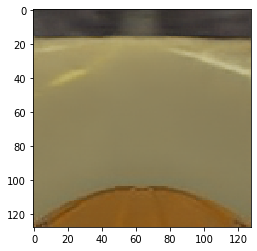

[ 0.0586463   1.1236075   0.05138923 -0.13642828  1.841543    0.62151474
  0.13387243  0.9422158   0.17373794  0.1479221  -0.25387976 -1.4013876
  1.2666048   0.17322701 -1.7949351   0.55150634 -0.10284188 -1.9412427
  0.61273736 -0.4156857   0.93215     0.9884641  -1.0156708   0.8971475
  2.0294933  -0.00279079  0.5342723   0.21066943 -0.03207868 -0.66063666
 -0.924371    0.12279665  1.2791983   0.3296435  -1.3672402   0.24028872
  0.9991979   1.1580552   0.4678817   0.22042005  1.046892    0.91374224
  0.4039203  -0.24628684  0.42416424 -0.16519156 -0.31579003  0.3993249
 -0.14392959 -0.3688906  -0.23658745  0.7899466  -2.4189973   1.4891937
 -0.29753095 -0.15112504  1.7674938  -0.87590814  0.06461336 -0.48063168
  0.0225836  -0.56440103 -0.60156846 -0.0951532 ]


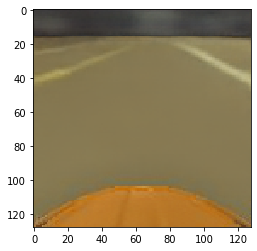

[ 0.30698198  0.8372074   0.10978301  0.6757083   0.8917812   0.16067713
  0.7102647  -0.03687631  0.52071935 -0.48899654 -0.11770312 -1.6865946
  1.4634185   1.1323776  -1.2678246   0.54506254 -0.5290727  -1.9234685
  0.59827965  0.44798023  0.43950164  0.14757572 -1.1065238   0.45475525
  3.1816306  -0.4446469   1.1212362   0.34935433 -0.33316264 -0.04999072
 -1.3324376   0.2508822   1.129503    1.341802   -1.1711999   0.24731627
  1.2691623   1.3530496  -0.05276795  1.230249    0.9975951  -0.1645204
  1.0061275   0.17361918 -0.19565634 -0.3226227  -0.76682806  0.12814233
 -0.4447097  -0.63415754 -0.57394296  0.67908174 -1.4496709   1.159529
  0.57048434  1.031781    2.3831158  -0.89301324 -0.08945523 -0.91764724
 -0.29873458 -0.07685851 -0.30742976 -0.8784848 ]


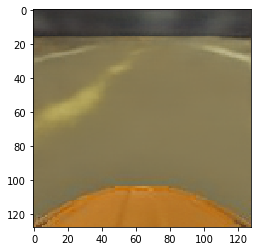

[ 1.3050553e+00  1.2217977e+00  1.4284785e-01 -5.3008497e-01
  1.9171450e+00  5.0215751e-01  2.4188720e-01  7.1077728e-01
  3.5535285e-01 -3.1586131e-01  4.7488466e-01 -5.2057689e-01
  8.5301870e-01  1.1713718e+00 -1.5069371e+00  8.6262703e-01
 -9.5304376e-01 -1.9104003e+00  1.0894597e+00 -2.4079710e-01
  2.4242397e-01  3.2309836e-01 -1.6035995e+00  5.4477447e-01
  2.0309906e+00  3.7857700e-02  1.4820273e-01 -1.2768869e-01
 -3.2630004e-04 -1.4724469e+00 -8.4067130e-01 -5.1947403e-01
  1.1943072e+00 -4.0819502e-01 -1.0080723e+00 -2.9365563e-01
  1.8168536e+00  8.6086732e-01  8.6012524e-01  5.9554398e-01
  1.5194789e+00 -4.6289331e-01  1.5773404e-01 -4.0898082e-01
  2.7274817e-01 -6.7709041e-01 -2.1737323e+00  5.7165581e-01
  1.8088475e-01 -4.8884264e-01 -6.0397398e-01  1.0561767e+00
 -2.7370863e+00  1.4496706e+00 -4.3634862e-01 -1.0836349e+00
  2.1241651e+00 -8.3283997e-01  4.1722313e-01 -2.1322325e-01
 -2.6392865e-01  1.3967241e-01 -9.7474420e-01  7.4533939e-01]


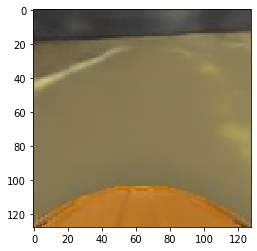

[-4.2280875e-02  1.6752108e+00  2.1964423e-03  6.1332121e-02
  8.3716798e-01  6.4575917e-01  3.6268032e-01  1.7432699e-01
 -3.5446599e-01  2.5332245e-01  6.5611553e-01 -3.1284985e-01
  6.4330220e-01  1.7489629e+00 -1.1462928e+00  7.3681271e-01
 -4.1969019e-01 -7.7783072e-01  1.3897417e+00  2.8083724e-01
 -2.2324897e-01  5.6278563e-01 -8.5892183e-01  8.5369092e-01
  1.8458200e+00  1.9108959e-01  3.3275867e-01  5.6728649e-01
 -4.8367932e-01 -9.4659293e-01 -1.3717710e+00 -8.0435991e-01
  7.3215348e-01 -4.3533079e-02 -8.1644213e-01  7.3665723e-02
  6.7940652e-01  1.2676229e+00  7.5573750e-02  1.1570352e+00
  1.4936465e+00 -1.2403781e+00  9.5228261e-01 -3.5834739e-01
  5.7158485e-02 -1.6147827e+00 -1.8868687e+00  7.3852521e-01
  6.5802410e-02 -8.6362320e-01 -1.8242370e-01  7.3441952e-01
 -2.5910845e+00  1.4609977e+00 -1.8533623e-01 -5.0304216e-01
  2.2508440e+00 -4.3329671e-01 -1.6847393e-01  2.8768387e-01
 -3.5224876e-01  2.3828860e-01 -1.7299116e+00  1.9652589e-01]


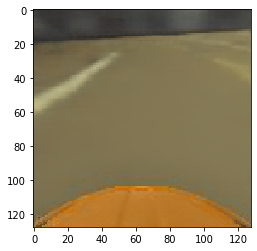

[-1.2429904   1.1318129   0.07118554  0.35040063  0.6404325   0.91647583
  0.229624   -0.6187438  -0.41505176  0.26284334  0.36861032 -0.0776768
  0.4817312   1.5266657  -0.26536912  0.8547389   0.16662869 -0.14255986
  1.5752925   1.4350922  -0.87560415  0.4731043   0.02615488  0.48050326
  1.0747502  -0.09308593  0.1381511   0.83558327 -0.58794236 -0.754927
 -1.8280759  -1.2879134   0.3048516   0.4546589  -1.0882324   0.14340305
 -0.47674596  1.0213243  -0.02908029  1.4526912   0.89310294 -1.4687986
  1.0805137  -0.26366046  0.34454274 -1.8562901  -1.8247632   0.4258933
  0.74042964 -0.07332601 -0.5381684   0.18887556 -1.9875038   1.3775704
 -0.07280529 -0.49583423  1.9350038  -0.59070027 -0.60480255 -0.08839086
 -0.4690611   1.0248178  -1.1980126   0.01062734]


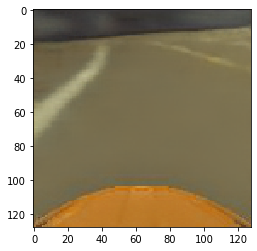

[-1.3850263   0.52616537  0.01523576  0.22311662  0.4642134   0.67018163
  0.32233703 -0.8160053  -0.66397816  0.1823112   0.5680009   0.45656756
  0.14133842  0.88301647  0.04911897  1.0978839  -0.21523811 -0.23603621
  1.6668062   2.1449459  -1.160208    0.7987339   0.20317137  1.1502935
 -0.02438476 -0.4651532  -0.25217104  1.313342   -0.5653718  -1.432673
 -1.5683075  -1.8107876   0.5865728   0.63573    -1.1060418  -0.4336612
 -0.9114598   0.36147884  0.40676242  1.4857315   0.18010607 -1.153701
  0.7272062   0.00956323 -0.04029186 -2.303758   -0.895473   -0.04277156
  0.48826432  1.0847023  -0.75342596  0.01988935 -1.6130754   0.97917026
 -0.04654158 -0.84263116  1.7598313  -0.2573165  -0.40862697  0.3095199
 -0.76903737  1.5831293  -1.0065086   0.07738581]


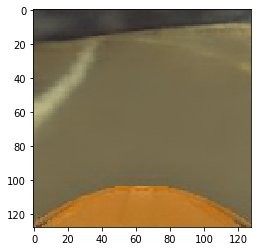

[-1.5216742   1.0886432   0.6027778  -0.21112266  0.09299263  0.9393059
 -0.05669822 -1.1872227  -1.0855279   0.41447577  1.0101806   0.73693806
  0.68043315  1.633065   -0.2978856   1.1986636  -0.30264485  0.17790654
  1.1941459   1.3915474  -0.64948475  0.46176475  0.08288619  1.2746531
  0.02135867 -0.24564852  0.65851694  1.231105   -0.21159181 -1.2211266
 -0.7918979  -1.8544163   0.09355229  0.41913453 -0.38283873  0.08675723
 -0.2000593   1.0076348  -0.16076094  1.6801553   0.550973   -2.029564
  0.48725918  0.19940719  0.44101316 -1.5866144  -2.2919836   0.2779723
  0.49547002 -0.08955485 -1.4142041  -1.0769958  -1.6597929   0.63961273
 -0.03066707 -1.3613515   0.93284774 -0.5159707  -0.36930427 -0.12098697
 -0.43115777  0.73450124 -1.5073308   0.1730868 ]


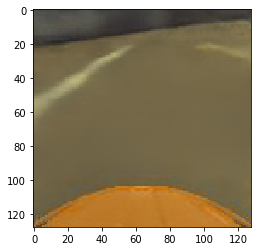

[-1.0304172e+00  1.0596833e+00  2.4159904e-01 -2.6849109e-01
  2.6684734e-01  7.5275183e-01  4.0520608e-01 -4.7686875e-01
 -6.8597251e-01  6.7909628e-02  6.2570959e-01  2.6568165e-01
  3.2638070e-01  4.9420255e-01 -5.0456864e-01  4.6217832e-01
  1.9089057e-01 -2.0231146e-01  7.1337003e-01  1.1561308e+00
 -6.2801075e-01  2.4637701e-01 -1.7474036e-01  9.9764705e-01
 -1.1786100e-01 -5.4664537e-04  1.6792070e-02  8.5348397e-01
 -1.7597446e-01 -1.2701907e+00 -4.0505770e-01 -9.1334522e-01
 -2.0551607e-02  3.2813825e-02 -1.0230378e+00 -3.0172658e-01
 -2.4057212e-01  5.8524770e-01  5.3906351e-01  6.3795769e-01
  4.2607206e-01 -1.2663901e+00  7.2111011e-02  2.2450171e-02
  4.1246665e-01 -1.6273766e+00 -1.4080361e+00  2.6543903e-01
  1.5875918e-01  5.0711828e-01 -1.2732314e+00 -1.2651300e+00
 -2.2468626e+00  1.0554746e+00 -1.5175757e-01 -7.8659421e-01
  9.4394314e-01 -5.5823219e-01 -7.3526871e-01  3.6116913e-01
 -5.0833261e-01  5.0733978e-01 -1.0671755e+00  3.0694014e-01]


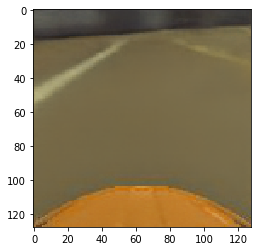

[-1.2253798   0.50653094 -0.4069034  -0.40517235  0.2039591   1.0096366
  0.44454825 -0.06244677 -0.13367364  0.21165144  0.39799628  0.01591588
  0.28343144 -0.2711078  -0.1374892  -0.46941042  0.6084893  -0.18661329
  0.15434511  0.8976391  -0.32038414  0.52618974 -0.4638145   0.43989673
 -0.3230664  -0.2104284  -0.10930975  0.5471636  -0.4413154  -0.64065295
 -0.3354481  -0.41712567 -0.20362635 -0.15273654 -1.2462114  -0.45182583
 -0.19803771  0.20246622  0.66153437 -0.07033314  0.5074938  -0.5635026
  0.06238687 -0.07513756  0.06466432 -1.1905072  -0.507474    0.5152083
  0.18237239  0.71138495 -1.3864669  -1.163352   -2.1664505   1.7355583
 -0.15947035 -0.32404563  0.41680157 -1.0934852  -1.0021211   0.3816011
 -0.1719285   0.19136877 -0.90762305 -0.24951616]


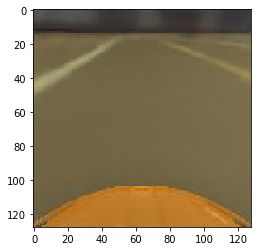

[-1.1806502  -0.50583327 -0.44701117 -0.36018848 -0.25473532  0.9606866
  0.6740989  -1.1489346  -0.2922076   0.0434168   0.28587997  0.60274625
  0.7101393  -0.5453392   0.54321885 -0.23268807  0.6289945  -0.06946316
  0.39717194  1.8043171  -0.01942895  0.62758595  0.07240123  0.46096772
 -0.76440394 -0.70743424 -0.4596405   1.1385765  -0.17701828 -0.9732965
 -0.17522675 -0.95943093 -0.12254776  0.47619814 -1.0078456  -0.94205153
 -0.70835257 -0.3712589   0.6297887  -0.09746799 -0.4659695  -0.4653247
 -0.14710966  0.47464433 -0.26983264 -1.2106887   0.01297258 -0.18960556
  0.3345907   1.3243204  -1.6236057  -1.2010539  -0.6399839   1.4431933
  0.07496512 -0.38082927  0.26202255 -1.5610936  -1.106891    0.4125695
 -0.24508592  0.7321424  -0.10863123 -0.535807  ]


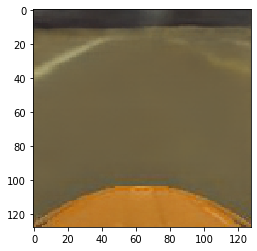

[-2.77661353e-01 -7.41802573e-01 -2.55058467e-01 -3.95525634e-01
 -4.30123180e-01  1.73846459e+00  1.18595433e+00 -2.62035668e-01
  8.80467534e-01 -2.18193382e-01 -2.76842207e-01 -4.37514454e-01
  9.26109672e-01 -1.20412064e+00  5.52307487e-01 -6.79091692e-01
  1.00344725e-01 -3.63924354e-01  9.08999443e-02  1.21908617e+00
  8.99060905e-01 -4.55608517e-02 -5.11050224e-01 -5.70265710e-01
  5.40594280e-01 -3.43958288e-01  3.26239616e-01  6.30257875e-02
 -4.15571362e-01  5.21401942e-01  2.37546414e-02  4.71301645e-01
 -3.89201641e-01  7.18396187e-01 -1.37093532e+00 -7.40253687e-01
  6.94718361e-01  8.77700746e-04  1.17831118e-01  2.21199647e-01
  8.12284470e-01  3.59984785e-02 -1.38328969e-01  3.22609752e-01
 -4.31902111e-02 -2.42260784e-01 -6.72208607e-01  1.58382386e-01
 -3.51046771e-01  7.61071384e-01 -1.68878150e+00 -7.54959464e-01
 -5.18326759e-01  1.93359566e+00  1.16892016e+00  4.13692087e-01
  2.46607199e-01 -1.74082482e+00 -1.12752438e+00  2.04237729e-01
  8.97170663e-01  3.29973

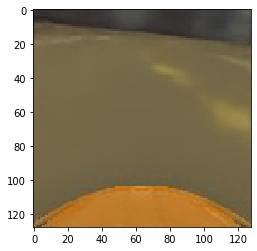

[-0.42971665  1.2150053   0.28962517 -1.1756208  -0.46811625  0.1515275
 -0.8572399   0.8858085   1.1088135   0.30794623 -1.4322407   0.36803937
  1.6135125  -0.1755927  -1.9694773   0.42196047  0.45807835 -1.7461993
 -1.1859951  -1.7589332   1.4366655   0.73470604 -0.14737704  0.70302606
  2.6235862  -0.46062216  0.862831   -1.8091208   1.1746998  -0.7781199
  1.5865715  -0.04723709  1.6145315  -0.01056434 -0.4759556   0.5757253
  2.9307587  -0.91801983  0.5357284   0.6516296   2.5909266   2.5791872
  0.27392298  0.39771405 -0.14149906  1.023309   -0.90166485  0.55081093
  0.65680784 -0.6795018  -0.61623824  1.0507321  -1.4228575   0.6335875
 -0.97180325  0.07918505  0.5673076  -0.52137214 -0.3723947   0.7167349
  0.9666437  -0.78992707 -0.7546954  -0.11028239]


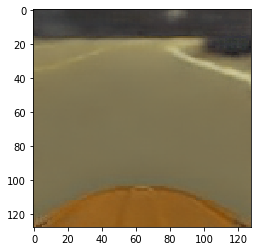

[-8.44144225e-01  1.09445214e-01 -2.48886049e-01 -5.09022951e-01
 -6.79482222e-02  1.21535885e+00  9.02940154e-01 -3.99994761e-01
 -1.23074278e-01  2.05652237e-01 -4.10089850e-01  2.89052203e-02
  6.40980959e-01 -1.01404369e+00  7.53320083e-02 -7.11528778e-01
  1.21845615e+00 -7.68956065e-01  6.65816724e-01  5.94662368e-01
  1.00528455e+00  8.04441810e-01  4.25807327e-01 -5.31758249e-01
  6.67874217e-01 -5.11330180e-02  9.99897569e-02  1.68807292e+00
 -5.87645233e-01 -6.46441281e-01 -2.21653983e-01  5.28908134e-01
 -2.75328219e-01  5.78569889e-01 -5.52211225e-01 -9.97651219e-02
 -5.03013551e-01  1.90827578e-01  3.37776035e-01 -1.28367350e-01
  1.48745999e-03 -2.49862209e-01  7.16887772e-01  4.55830246e-01
 -3.11854720e-01 -1.70061707e-01 -1.90444767e-01  6.06719106e-02
  1.87295288e-01  6.99730098e-01 -1.28814709e+00 -1.42877743e-01
 -1.09643996e+00  1.54611468e+00  2.53795236e-01 -4.23554301e-01
  6.90806329e-01 -1.25752127e+00 -1.46557307e+00 -2.60743126e-03
  2.99380511e-01  2.84058

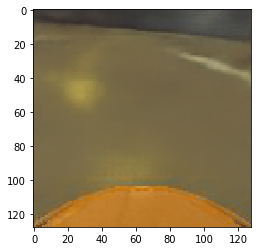

[ 3.0542247e+00 -6.5958691e-01 -1.3260347e+00 -6.1892915e-01
  9.6428716e-01  6.0888642e-01  1.4681361e+00  1.0797640e-01
  3.4585536e-02 -8.3679569e-01 -4.7377941e-01 -5.6055582e-01
 -6.3233912e-01 -1.8788977e+00  4.7018474e-01 -4.9411726e-01
 -5.9213024e-01 -2.1883333e+00  4.3145815e-01  4.9029094e-01
  2.0334818e+00 -1.3707532e-01 -1.3044906e+00  7.1326751e-01
  1.6187553e+00  1.5797931e+00  3.4024596e-01  6.4443886e-01
  2.5941530e-01  1.5065035e-01 -1.7038733e-01  1.1721770e+00
  1.4757551e-01  4.3682167e-01 -6.0175079e-01 -4.0100202e-01
  1.9946790e-01 -4.3461606e-01  1.9156716e+00 -8.2069385e-01
  8.0276906e-02 -1.1046685e+00 -8.2148474e-01 -4.5021376e-01
 -1.1594012e+00  2.0110137e+00  3.9677855e-01 -2.4841610e-01
 -4.6262592e-01  5.9038597e-01 -1.6787084e+00 -1.4895473e+00
  6.3974047e-01  2.2934787e+00 -5.1672304e-01 -1.1383545e+00
  1.3097159e+00 -1.9628905e+00  4.6763679e-01  2.1495669e+00
  1.3318404e+00 -2.2543520e-03  1.6859795e+00 -1.5952927e+00]


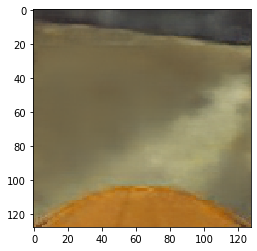

[ 1.9101298  -2.5401576  -0.5700875  -1.1901195   0.12653044  1.9501673
  0.5717521  -1.3601428   0.76224273 -0.17475054 -2.3065064  -0.29599315
  0.30765286 -1.273633    0.25735033 -0.75443304 -0.86335975 -0.6270977
  0.16105412  1.0071874   0.52559996  0.43559211 -0.33905345  0.38346285
  1.0487363   0.33490947 -1.2685179  -0.9193158   0.6146671  -0.17158279
  0.5950141   0.9199277   0.3922137  -0.18125585 -0.77468723 -0.54544336
  0.5058672  -1.4657767  -0.2720232  -0.09311552  1.1990371   0.60999495
 -1.1496816  -0.10100458 -0.58971137  1.7980356  -0.26897708  0.24500114
 -0.6185081  -0.24919644 -1.5851943   0.923432   -0.06062312  3.4136474
 -1.3768955  -0.8733032   0.36767435 -1.8941929  -0.55111814  0.94546133
  1.6243691   0.34745193  0.6773876  -0.9940645 ]


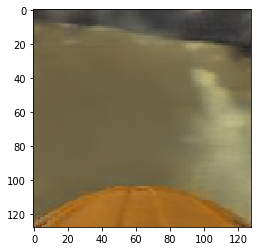

[-0.49299994  0.53320795 -0.4518183   0.21843185  0.41320837  0.36994046
  0.26592433  0.57251966 -0.18081361  0.40240774 -0.96799016 -0.9694223
  0.30168548  0.2761798  -1.845054    0.3562255  -1.0214355  -1.183447
 -0.66698456 -0.83065873  0.80316573  0.7010752  -0.85867256  1.1845258
  2.603455    0.10021831  0.78716785 -0.9071113   0.4758689   0.00380241
 -0.08502907  0.23419553  1.1588621  -0.10879643 -1.1381217   0.21442375
  1.9409355   0.36680117  0.03474892 -0.65862083  1.9909095   1.0281055
  0.5177916  -0.08141015  0.58730125  0.48757902 -0.17312658 -0.21420984
 -0.2791665  -1.2907038  -0.71930647  0.8446271  -1.4916735   0.3421807
 -0.28898624  0.25102076  0.9356128  -0.11306277  0.18364242  0.36217692
  0.9680848  -0.5849123  -0.7451151  -0.6852038 ]


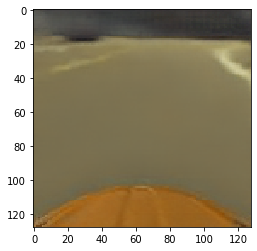

[ 0.3313739   0.7150956  -0.06277023 -0.3650331   1.557203    1.1862193
 -0.62387115  1.4952465   0.3725423   1.0114945  -1.1966158  -0.7302428
  0.84054464  0.33806598 -2.7110298   0.27834177 -0.5398816  -1.6826249
 -1.0140377  -1.0090792   0.45118988  0.6068746  -1.051973    0.4594168
  3.1413975   0.12195109  0.50294846 -1.9774784   0.99252695 -1.0936887
 -0.30762365  0.02215248  1.8941462   0.13627085 -0.6054956   1.0276155
  2.110164   -0.38481665 -0.31657976  0.29100055  2.5297964   2.423795
  0.445548   -0.130766    1.2024851   1.2355919  -0.24333104  0.5285381
  0.44222224 -1.3469474  -0.02083625  0.8638873  -1.2695842   0.20309192
 -0.7151869   0.24050856  0.91987264 -0.19702879  0.85978395  0.0649235
  0.2827939  -1.1564049  -1.194461    0.06287737]


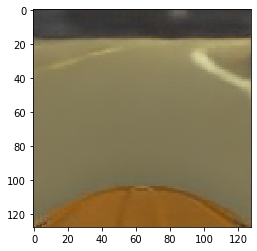

[ 1.6752902  -1.8698143  -0.69778764 -0.67753106  0.8021358   1.7099667
  0.48236257  0.5080712   1.4528606   0.41858926 -2.476721   -1.3497596
 -0.18016721 -1.5613377  -1.7098774  -1.2511512   0.2159199  -2.3782887
 -1.3611465  -0.6176047   0.6295936   0.26851922 -0.7599947  -0.948366
  4.2967405  -0.32372013 -0.6893203  -1.2829713  -0.3286771  -1.8043891
  0.33525172  2.23887     2.7610934   1.7459975  -0.32121035  0.35063687
  1.4901208  -1.6959757  -1.2857665  -1.4368339   0.72049236  2.8849785
  0.2736029  -0.02753172  0.38427225  0.8826372   1.0386686   0.72974104
 -0.5249072  -0.3158377  -0.32101673  0.664296   -0.47088006  1.7383738
 -0.40638912  0.3743541   1.3158253   0.05424917  1.5081873  -0.16019154
  1.0588257  -0.7810921   0.9408864  -1.0092456 ]


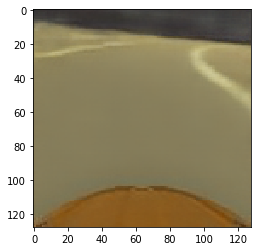

[ 0.76320475  1.41122     1.0825607   0.7124434  -1.5098194   0.46258467
 -0.11655152  0.6599462   0.73286253 -0.03555979 -1.1901541  -0.6520466
 -0.0407302   1.0523316  -2.423654    1.3794315  -0.992789   -1.8449892
 -0.08986343 -1.228282    1.0038401  -0.68254685 -1.0132265  -0.05990057
  5.322443   -0.6862708   1.2712077  -0.75489247  1.6912416  -0.8985375
  0.20620906  0.7595005   2.3153708   1.6516573   0.23663953 -1.0320606
  2.842161    0.0929281  -0.26535842  0.4430549   2.1658192   0.28947973
  0.05198795  0.1805425  -0.21194576 -0.13871011 -0.9087988  -0.12475443
 -0.32899803 -1.8979452   0.05463786  0.58528984 -0.3646957  -0.39570394
 -0.13071418  1.1875072   1.8625373   1.2536798   0.95073366 -0.53573364
  0.91343594 -0.42748708 -0.55696845  0.3692364 ]


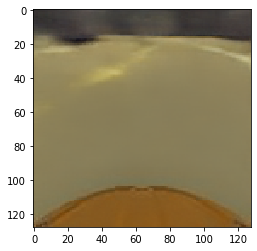

[-0.01300313  0.14984527 -2.2314827  -1.1096654   0.03747139 -0.8642836
 -0.89926726  0.23435062  1.0336819   0.4897014   0.78497946  0.07672655
  0.9572227   1.0104923  -1.2562623   0.5819386  -0.5613665  -1.8901256
 -1.43946    -2.0659444   1.418513   -0.30760646 -1.3393283   0.29777828
  2.619888   -0.31948075  0.7105031  -0.81118935  1.2656702   0.34202713
  0.08701164 -0.23774871  0.9985723   0.79699033  0.15612045  0.44951776
  1.4807948  -1.8638033   1.0789979  -1.8153329   2.0059478   0.14974923
 -0.93560034  0.39774397 -0.38338596  2.1210902   0.66874593  0.05512893
  0.76876426 -1.0128694  -1.4538547   0.5554962   1.3272718  -0.573822
  0.87858206 -0.11101998  0.43272614 -0.18908845  1.235942    0.5532037
  0.51569307 -0.26103348 -0.7354757   0.2993635 ]


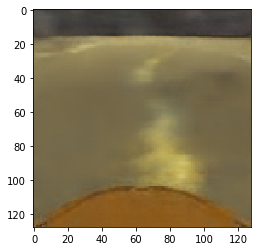

[ 1.1448679  -0.6819369  -1.5308919  -0.61398554 -0.41349593 -0.03426677
 -0.9485564   0.2790221   0.4920668   0.16488525  0.43585974 -0.05769821
  1.7798125   2.0409415  -1.7736288   0.65948296 -1.0494646  -1.7058367
 -1.164895   -1.2940971   0.18520929 -1.4825819  -1.8208723   0.22455305
  3.339818   -1.0872718  -0.24299033 -1.8815114   0.3618569  -0.4345257
  0.19839779 -0.26524305  1.4943354   1.5296906   0.2024546   0.11282662
  2.3733778  -1.509102    0.49657342 -0.34617078  1.5412015   0.46232325
 -0.53999275  0.03901532  0.75694597  0.8089948  -0.40723798 -0.31670496
 -0.1326769  -0.5668869  -1.7631212  -0.33563346  0.96343124 -0.38896203
  1.8013687   0.6596228   0.5298602   0.06476894  1.8876748  -0.19914171
  0.10180601 -0.11146228 -0.78814393  0.0327421 ]


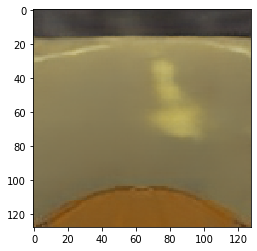

[ 1.3013629e+00  3.8665438e-01  3.0895582e-01 -3.0508494e-01
  1.6376381e+00  1.3102885e+00 -3.7974119e-01  1.6495283e+00
  1.0590971e+00  9.1692483e-01 -1.4986492e+00 -1.1676295e+00
  6.0071635e-01 -6.6213232e-01 -2.5674772e+00 -1.5394366e-01
 -7.7341956e-01 -1.9756328e+00 -1.1754978e+00 -1.2695024e+00
  5.4613370e-01 -7.7750817e-02 -1.7264698e+00  2.1932311e-02
  3.7416587e+00  5.8647388e-01  4.3777019e-01 -2.0657370e+00
  6.4435136e-01 -1.0191479e+00 -2.9959232e-01  7.4483836e-01
  2.5416784e+00  2.1468669e-01 -5.5696940e-01  8.4521937e-01
  2.6197276e+00 -4.0326610e-01 -4.7100067e-01  9.8008469e-02
  2.4617789e+00  2.3346775e+00  5.1064205e-01 -9.0111929e-01
  9.0735614e-01  1.3777403e+00 -1.0747686e-03  7.4135125e-01
  8.9694583e-01 -1.5367886e+00 -2.4344310e-02  3.8091108e-01
 -1.4157423e+00  5.5591077e-01 -5.9009385e-01  3.0861324e-01
  1.0569415e+00 -2.4158373e-01  1.1240782e+00 -2.5863400e-01
  5.0670099e-01 -1.4864722e+00 -1.0413868e+00  5.8108523e-02]


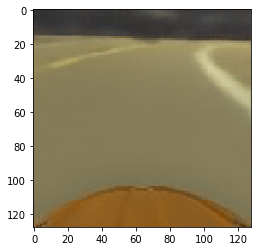

[ 1.0676934e+00 -2.0404342e-01 -8.4035620e-02 -6.4509884e-02
 -5.3218937e-01  4.9807012e-01 -8.3352041e-01  1.3576297e+00
  1.0945971e+00  1.0002597e-01 -1.3942616e+00 -1.1179086e+00
  2.3217998e-01  7.4779314e-01 -2.3916521e+00 -1.6540194e-01
  4.1304433e-01 -2.9415057e+00 -1.8665133e+00 -2.3313935e+00
  2.1979667e-01 -2.5127596e-01 -1.6358850e+00 -7.5644153e-01
  4.6260142e+00 -8.7913108e-01 -1.0374004e-01 -1.7451123e+00
  8.8913959e-01 -8.3128542e-01  7.8124464e-01  1.3249408e+00
  2.4465721e+00  1.2280657e+00 -2.1261647e-03  3.0868581e-01
  2.8634188e+00 -1.6262385e+00 -7.6108240e-02 -7.4274784e-01
  1.9069208e+00  2.2763135e+00 -4.9188858e-01 -2.2948632e-01
  7.1275586e-01  6.3509238e-01 -6.5415984e-01  1.6627237e-01
  8.1980145e-01 -9.7372943e-01 -5.9317267e-01 -7.0235181e-01
 -6.4681238e-01  4.8481199e-01 -6.4877051e-01  7.4087286e-01
  1.2027099e+00  7.1980524e-01  1.8301693e+00 -3.8946036e-01
  1.5553325e-01 -8.4247005e-01 -2.3207434e-01 -3.3846605e-01]


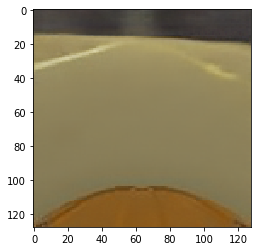

[ 1.0203668   1.1097492   0.81117636  0.46400064 -0.12393585  0.33925027
 -0.8570807  -0.232526   -0.83308965  0.6740762  -0.08143038  0.66640025
 -0.9982866   3.1641402  -2.1999981   2.6740685  -0.5014245  -1.7374076
  0.48465487 -0.81352115 -1.8559113   0.6554489  -0.7068424   0.09845144
  3.7980957  -0.04220928 -0.02519161 -0.55772245  0.818948   -3.4428766
 -0.5421626  -1.4440496   2.8835008   1.4140251   1.3568836   0.2421948
  1.6185127  -0.6868846   0.19184011  2.055573    1.1556228  -0.35672623
 -0.09559858 -0.01873276  0.5737151  -1.8881222  -2.4253044   0.88911074
  0.10693413 -0.6002662   0.7529708  -0.59634167 -1.5147116  -1.5411812
 -0.5563164  -0.95249516  2.7573662   1.5947407   2.6510231  -0.66864645
 -0.6270138   0.09305568 -1.6731853   1.9720572 ]


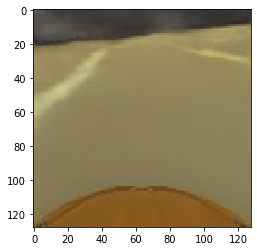

[ 1.101734    0.6892748   0.052193   -0.32221085  0.32481393  0.44948536
 -1.0032368   1.4993775   0.62124515  0.9183092  -0.53146935  0.3944095
  0.33113167  1.7432821  -2.9865134   0.6987895  -0.48738924 -1.5965868
 -0.4605197  -2.5312948  -0.48860937  0.03494583 -1.756747   -1.0434853
  4.008596   -0.34119138 -0.33310175 -2.2019734   1.2811133  -1.9693917
  0.88777614 -0.19368203  2.200094    0.44966504  0.38140774 -0.18280163
  3.0305545  -0.98569983  0.34073716  0.50539535  1.5929977   1.4066483
 -0.17194456 -0.23113069 -0.01988499  0.6389868  -0.85044086  0.38354403
  0.523453   -0.39553466 -0.09855101 -0.14134711 -1.1684432  -0.7574031
  0.0879463  -0.5669313   1.2751802  -0.15401116  1.8714353  -0.33551213
  0.12509817 -1.1799587  -1.3731894   1.0886637 ]


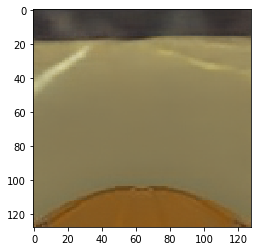

[ 2.874108   -1.2694452  -1.5580195  -0.32795972 -1.5433456   0.04702729
  1.1812     -1.8126005  -1.8219469   0.6349076   1.108688    0.786088
 -2.5936291  -0.7237369   0.2935512   0.73536843  0.00390602 -3.1242177
  0.11822538  1.4299724  -0.7064434   0.36477894 -0.6135681  -0.19138661
  2.1950538   0.9214787  -0.3899292   2.5573742  -0.7886814  -3.8993363
 -0.18665983 -0.20955455  3.0141246   3.8155422   2.1971612   0.22311708
 -0.79711735 -1.9505723   1.0832572  -1.0220379  -2.414264   -1.135384
 -0.04034266  0.44564274  0.02126221 -0.71395135  1.1624749  -0.26189682
 -1.416836    0.73191804 -0.344562   -1.338089    1.6385949  -0.7887042
  0.15436119 -0.9481638   2.4580562   2.095594    3.681913    0.7132254
 -0.11891589  1.1235507   1.2311307   0.55732346]


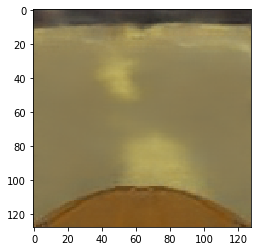

[ 1.7548192  -1.3389277  -0.23933958  0.15998195 -2.450334    1.3734739
  0.9555267  -0.30093563  0.42801952 -1.151536   -0.47697866 -1.1222502
 -0.40264753 -0.41614607 -0.80630964 -1.2188998   1.7241753  -3.371598
  0.12724237  1.2115008   0.5280694  -0.64645875  0.23275143 -1.7770243
  4.9119477   0.8206563  -0.32683092  0.9340726  -0.13919991 -1.6688303
  1.90616     2.5114548   1.248343    3.4911618  -0.18399242  0.14878777
  1.2623612  -1.1994009  -0.9501193  -0.02311327 -1.2962404   1.3968133
  0.12403351  1.1976464  -0.32224822  0.38009688 -0.07685316  0.32608405
 -1.3873185   1.2603933  -1.0426527  -1.0337842  -0.6676758   0.70547366
  0.22226948  1.2460057   3.3355699  -0.63474953  0.42728853  0.98012716
  0.3673708   0.8774044   2.3415523  -1.797985  ]


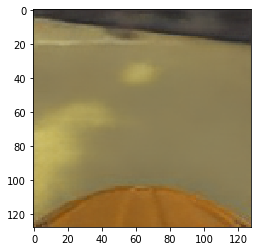

[ 1.1768423  -0.43961012  0.03160573  0.40727085 -1.7198567   1.1959665
  0.62091494 -0.19664448  0.01493624 -1.4402491  -0.2901463  -1.349156
 -0.48416644 -0.46488515 -0.5334865  -0.92735994  1.0036395  -3.7223504
  0.20474462  1.0382569   1.5935714  -0.67133325  0.19245785 -1.3371675
  4.3180003   0.17103966  0.8450439   1.59923    -0.5317008  -1.7859461
  1.2936283   2.591332    1.434463    3.7983768  -0.72497594 -0.30485046
  0.87038916 -0.5587798  -0.70011824 -0.7717911  -1.4659117   0.55178475
  0.01647621  0.9453486  -0.1631745  -0.38244423 -0.8777413   0.14374465
 -1.332531    1.0632864  -1.6105417  -1.0824459  -0.6741782   0.97762364
  1.0423405   0.7285599   2.4274788  -0.05515257  0.44700983  0.3758045
  0.4488511  -0.11131124  3.3119054  -1.9389424 ]


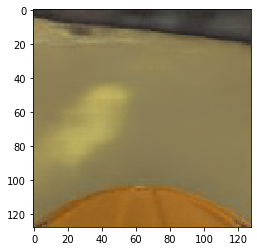

[ 2.1995234   0.0791515   1.041886    0.19362222  2.82499     1.3547611
 -0.43481082 -0.3902471   0.98754925 -1.3162675  -0.08615085 -1.2773291
  2.0520902   0.4928953  -0.92439234  0.9175862  -0.3650694  -2.4409246
  0.58826935 -0.09512489  0.31716615 -0.38736802 -2.2488682   0.03247125
  1.9166297   0.43747798 -0.03599619 -1.6414603   0.191044   -0.9372975
 -0.12343265  0.07486388  0.8624367   0.03014114 -1.1311423   0.56421113
  2.5766244  -0.09470508  0.7466488   1.4649389   1.2226769   0.79976314
 -0.58416885 -0.12390063 -0.16183601  0.7021843  -2.47757    -0.20792083
 -0.3068899   0.64857733 -2.390979   -1.1708639  -0.6602843   0.32523513
  1.3677413  -1.1900265   1.5575615  -2.8291686   0.46085104 -0.6667974
  0.1490945  -0.9648892   1.3045689   0.6520686 ]


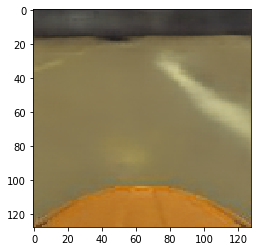

[ 2.911667   -0.11293203 -1.2287018  -1.252491    1.5943696   0.76981765
 -0.3315606   0.7491462   0.23278755 -1.2531359   2.4759305  -1.2198076
  1.8558015   2.267987   -1.1805725   0.32240212 -0.3507317  -3.6798341
  0.6818791  -0.9151965   1.4144382  -1.0787938  -3.3850796  -0.81303644
  3.128619   -0.32178342  0.30463976 -1.0250169   0.5271942   0.05471487
  0.9915315   0.5233128  -0.04446514  0.6826443  -1.2481321  -0.10514161
  2.9711525   0.3636814   1.9230343   1.1460377   1.4617116  -0.3600307
 -0.65894884  0.7673658  -0.00790708  0.28082874 -1.4140618   1.3281016
 -0.99775434 -0.12905934 -2.8452833  -0.46655923  0.35135546  2.0105252
  1.3759576  -0.86520314  1.5155135  -3.3361652   0.8815074  -0.15230903
  0.01891598 -0.9611233   0.83825254  0.5294028 ]


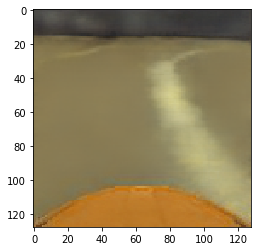

[ 2.4729552   0.01820859 -0.9323003  -1.4926709   1.3504169   0.7399619
 -0.34863725  1.2885889   0.63181126 -0.5872998   2.2621706  -0.8190182
  2.296815    0.4827183  -1.5233623   0.11157478 -0.03230747 -3.69442
  1.8850735  -1.5021287   2.6203167  -1.2859836  -2.772109    0.15998542
  2.5053728  -0.71484596  0.13459183 -0.6152842   0.68164593  0.0735093
  0.5584953   1.4424561   0.32212877  0.9025136  -1.5347397   0.5509149
  2.5639184  -0.06935129  1.6266735  -0.15031509  1.2057652   0.52081347
 -1.2297349  -0.3857834   0.01169188  0.61497754 -0.73605156  1.0225589
 -0.8384096   0.11618338 -3.0094266  -0.96455854  0.08600935  2.8177774
  0.83284026 -1.1227386   1.1662023  -3.0677493   0.20210241  0.40318373
  0.6823453  -1.4586589   0.8732254   0.10946803]


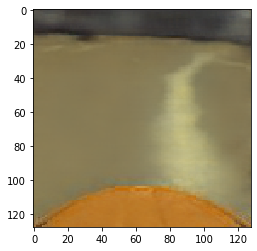

[ 2.4007654  -2.291588   -1.1448611  -0.78880495  0.4516993   2.1623657
  0.2967155  -0.42375958  1.5738869   0.09083161 -2.3047647  -1.2728416
 -0.22843714 -2.3503768  -1.1424689  -1.4242015   0.89304173 -2.637906
 -0.6632216  -0.12338596  0.91801417 -0.508409   -0.5706616  -1.3184001
  4.446574   -0.3314787  -1.1996809  -0.99128556 -0.7154194  -2.5040524
  0.38831687  2.5369895   2.7985828   2.1770792   0.6244338   0.08973721
  1.3871602  -2.2475271  -1.3886707  -1.7362555   0.30513334  2.4778037
  0.10193068 -0.37842152 -0.0670384   1.4199405   0.99491435 -0.24149996
 -0.8638618   0.42733076 -0.7508047   1.2297835   0.4082078   1.8205931
  0.52223617  0.2994993   1.7623309  -0.11363609  1.5978042   0.03312934
  1.4032688  -0.07511084  1.7895575  -1.1027938 ]


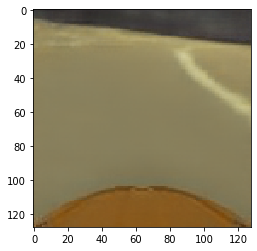

[ 0.4124405   0.15970555 -0.38029057 -0.35526723  1.7639709   1.1691071
  0.01115241  0.57730556  0.8372019   0.10815126 -0.9556613  -1.7696637
  1.3717945  -0.8249908  -1.542259   -0.15451372  0.2946207  -1.8250653
  0.21235318 -0.33490282  1.2869296   0.61740017 -1.0096064   0.36294192
  1.9721149   0.20311905  0.12168285 -0.3077611   0.14111343 -0.49109647
 -0.88213634  0.671206    1.0234214   0.11300208 -1.3810266   0.21350402
  1.1932627   0.40619472  0.17260763  0.19545798  1.4623004   1.6866245
  0.4060796  -0.49564746  0.29339758  0.502327   -0.2578883   0.43696767
 -0.1532906  -0.4214737  -0.47305918  0.692102   -1.8796216   2.0731714
 -0.51980335  0.15008347  1.1993521  -1.3123189  -0.44107953 -0.33659586
  0.53209376 -0.9566844   0.03949123 -0.6704861 ]


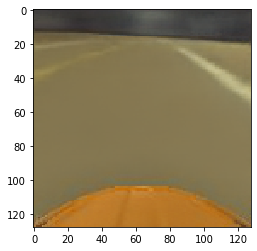

[ 0.11033026  0.989366    0.01823724 -0.05170758  1.429632    0.76314986
  0.1038025   0.7809582   0.22986025  0.14096664 -0.490178   -1.4552554
  1.4025096  -0.01089417 -1.7527417   0.53436667 -0.04346509 -1.8075842
  0.49465123 -0.44899517  1.1856005   0.76507074 -1.0192559   1.0130026
  2.195544    0.05506035  0.63098574 -0.18940045 -0.03296729 -0.34035984
 -1.0941056   0.2537418   1.2285287   0.29819602 -1.2339332   0.3859698
  1.182778    0.97309595  0.32574624  0.58465594  1.3604087   1.0756345
  0.4807027  -0.18289647  0.435624   -0.00604441 -0.37923425  0.32343358
 -0.1626215  -0.6877141  -0.4732952   0.6130219  -2.1337762   1.5940342
 -0.36460173  0.09197091  1.5603446  -0.79403746 -0.09785751 -0.45585737
  0.21875682 -0.6389931  -0.60874116 -0.50087553]


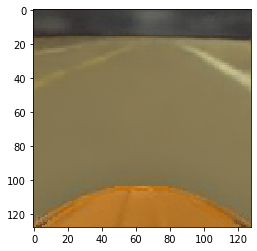

[ 0.09489001  1.3183259   0.32040256  0.1179737   0.53266305  0.10730457
  0.30847827  0.54134196  0.14754346 -0.5489241   0.03451302 -1.7991276
  1.3308223   0.77325624 -1.5517089   0.6893408  -0.04420724 -1.7606385
  0.6590528   0.16985041  0.4327582   0.58872306 -1.1998208   0.8177858
  3.1218514  -0.4037902   0.47700042  0.31571487 -0.29577097 -0.44634822
 -1.5480227   0.39777294  1.2392454   1.0441417  -1.14898     0.56048954
  1.3938866   1.0858036   0.05407207  0.82236767  1.1387573   0.18929413
  0.56075615 -0.2829058  -0.32513583 -0.32843217 -0.39079434  0.62224543
 -0.8342177  -0.8711103  -0.10085125  1.0857898  -1.8174291   1.0582815
 -0.30013883  0.6945426   2.4399378  -0.6545805   0.06947438 -0.78093547
  0.18941838 -0.51618963 -0.39909837 -0.720787  ]


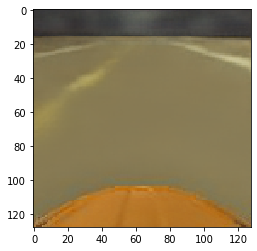

[ 0.04005656  1.0391301   0.01138727  0.28135943  0.47620443  0.15436742
  0.5486099   0.40216056  0.15995815 -0.3282934  -0.1328863  -1.6737916
  1.6457914   0.814184   -1.5501825   0.5681799  -0.24328    -1.5270139
  0.6534962   0.26604766  0.33155882  0.42459875 -1.0483398   0.8464815
  3.0056837  -0.13820882  0.46298087  0.21279745 -0.2517461  -0.3241503
 -1.5025635   0.32676825  1.2493979   1.016156   -1.0256457   0.46351084
  1.3680137   1.0339589   0.010698    0.969841    1.1708623   0.27855533
  0.884425   -0.0318015  -0.30121496 -0.29719585 -0.42590362  0.3060913
 -0.99345016 -0.7379504  -0.24475636  0.99750113 -1.7778089   1.0726128
 -0.05106414  0.9843104   2.3355024  -0.43761638  0.04433113 -0.81574255
  0.17396262 -0.33458382 -0.65743935 -0.8199846 ]


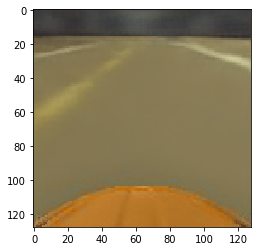

[-0.79144067  1.0225891   0.17602576 -0.2280408   1.6247497   1.1818287
 -0.01082298 -0.14432532 -0.575338    0.50457287  0.3453456   0.6825039
  1.2118448   0.8686076  -0.86635584  1.0747995  -0.27201784 -0.25964358
  1.0324315   0.6070842   0.43178016  0.6307693  -0.37251383  0.75900596
 -0.41949248 -0.69448763 -0.0787221  -0.1284081   0.24327725 -1.3406769
 -0.8287809  -1.751631    0.29726374 -0.39468893 -1.257952   -0.252151
 -0.04352761  0.715733    0.64398617  1.236746    0.73680246  0.01720734
  0.45647043  0.17245245  0.98077834 -1.121212   -1.0972493  -0.665877
  0.79117626  0.5835305  -0.76566637 -0.60467196 -1.36389     0.5749248
  0.42853528 -1.596834    0.705885   -1.572451   -0.59751755 -0.15070102
 -0.14804167  0.3468725  -0.911492    0.21810184]


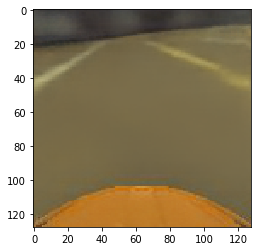

[-0.6173336   1.3499168   0.06210564 -0.37212974  1.4649808   1.3166738
 -0.21367665 -0.06712031 -0.1657      0.5108403   0.51491225  0.43145016
  1.1096274   0.6409071  -0.67337626  0.973487   -0.02761696 -0.479502
  0.8361595   0.2167117   0.20703185  0.89682794 -0.7733241   0.8162053
 -0.1549887  -0.7422019   0.34795174 -0.6806656   0.42976886 -0.6721596
 -0.6675049  -1.4150926   0.02457817 -0.8831132  -1.0988401   0.12674756
  0.6083068   0.6732395   0.92583454  0.9644842   1.273482   -0.17880316
  0.292444    0.1544688   0.601466   -1.0511111  -1.3240218   0.03587529
  0.4384094   0.05414189 -1.233966   -1.0936315  -1.8351238   1.2153352
 -0.17279822 -1.5719604   0.5384751  -2.0075772  -0.45547777  0.33656546
 -0.05548047 -0.10038567 -0.9857693   0.25760555]


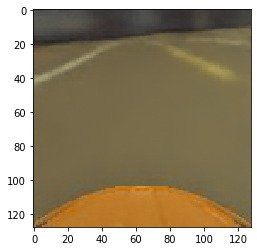

[-0.7361128  -0.703208   -0.46353805 -0.55354434 -0.08244398  1.5322108
  0.6844627  -0.77303433  0.42591935  0.07691264  0.6623613  -0.01885139
  1.145734   -0.10911097  0.64990705  0.1453746  -0.09887635  0.2926781
  0.15948637  1.5739754   0.5937155   0.01056553 -0.7089859  -0.2665679
 -0.7071515  -0.87705326  0.57216257 -0.43443006  0.3254565   0.3554583
 -0.4760396  -0.7357017  -0.610058    0.50655776 -0.9781873  -0.8169862
  0.51089966 -0.2852507   0.3109764   0.54033554  0.62775767 -0.5067991
 -0.8721064   0.12515002 -0.22456767 -0.26882738 -1.0125656  -0.24891937
 -0.25241655  0.60156494 -1.5886567  -1.176178    0.32907537  1.3991313
  1.0210948  -0.08871164 -0.23393942 -2.4523845  -0.54461277 -0.09462038
  0.5105978   0.48776627 -0.23971543 -0.76945055]


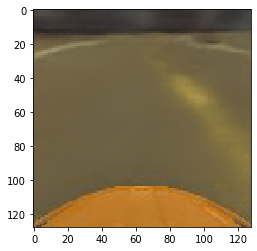

[ 0.2318769  -0.680801   -1.8485447  -0.54638684  0.0890784   0.22395562
  0.6011798  -0.27834842  0.3379491  -0.3567568  -0.37144518 -0.5259627
  0.66704655 -0.71249616  0.18866634 -0.77735007  0.29469737 -1.5519409
  0.0180383   0.43306524  1.1435018   0.43881607 -0.3321214   0.20419341
  1.9176927   0.02312458  0.66189384  0.94707423  0.0651722   0.3551445
 -0.30205357  0.7811018  -0.28361362  0.5734809  -0.14557683 -0.29325697
 -0.12969595 -0.5584872   0.38115647 -1.1788253   1.0201168  -0.2924062
 -0.19868803 -0.4437598  -0.39063165  2.4556148   0.7016086  -0.22657898
 -0.0144765   0.03020405 -1.1716841   0.74870545  0.7382269   1.3817948
  0.83191854  0.09336577  0.9715215  -1.1425799  -0.56681156  1.287602
  0.44994482  0.15238674  0.56506455 -1.4371531 ]


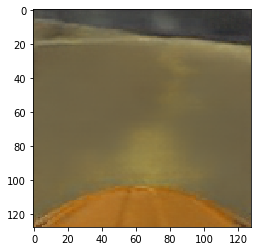

[-0.6637798  -0.07556481 -1.7118767  -0.50409824 -0.4062179  -0.20133048
  0.5773684  -0.25150985 -0.01910281  0.25179    -0.95887333 -0.19826019
  1.0925018  -0.6535891  -0.6722038  -0.54902345  0.0394218  -0.8001386
 -0.78448683 -0.5733587   1.7151008   0.33348113  0.22937143  0.6606254
  2.0136123   0.3575478   0.7837877   0.5314656   0.79265624  0.7472311
 -0.0511018   0.31099495 -0.06850924  0.5914308  -0.34688076  0.00209587
  0.633389   -0.5346242   0.2954616  -1.1435646   1.3020476   0.04584737
  0.11539871  0.17310974 -0.12448832  1.7798318   0.43688807  0.05289641
  0.68529606 -0.53727156 -0.6780821   0.4060892  -0.02591838  0.1287807
  0.12697278  0.60482484  0.24292214 -1.4080364  -0.93577904  1.3888538
  1.122591   -0.4130563   0.3978609  -1.3817044 ]


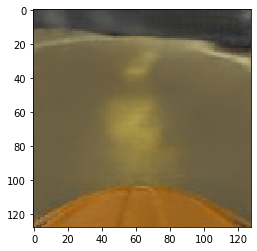

[-0.8136746  -0.20977265 -1.1883026  -0.45109546  0.28212985 -0.2553633
 -0.21810363 -0.6602256  -0.2136426   0.00251105 -0.29557312  0.12578204
  1.1571404   0.6127941  -0.6857851   0.49031    -1.1229475  -0.87634933
 -1.2067311  -0.43183208  1.8117731   0.52782655 -0.04255651  0.8611347
  1.9061475  -0.0181352   1.0375383   0.19024281  0.8347061   0.50062716
 -0.07156508 -1.3868797   0.38825923  0.3179858  -0.04030168 -0.54085535
  0.807497   -0.06158704  0.37560117 -0.51401365  1.5442394  -0.19460209
  0.16714823  0.6235919   0.6340975   1.5549449   0.0518659  -0.3928332
  0.81005406 -0.9783124  -0.4455582   0.7004333   0.6894883  -0.3394696
  0.73320025  0.4547804   0.22330718 -1.1396672  -0.01340966  0.5277054
  0.7089927   0.12752225 -0.4175064  -0.86247617]


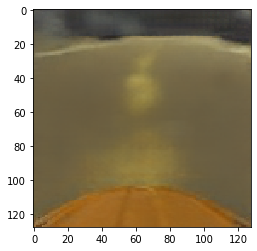

[ 0.8634668   0.09776934 -1.3651943  -0.8917403   1.2707976  -0.3761632
  0.23447774  0.19909507  0.25183827  0.44983742  0.15453307 -0.0995593
  1.4389107   1.4901748  -1.5896019   0.4711001  -1.3549325  -1.5537368
 -0.94985557 -0.85364413  1.0152744   0.00821804 -1.5473804   0.01133669
  1.9678674   0.2777506   0.35752594 -1.3390695   1.1288851   0.44311664
  0.04398721 -0.97814775  0.8122687  -0.21265781 -0.48538497 -0.49556443
  1.9102715  -0.013474    0.7952104  -0.57180774  2.2966747  -0.0138755
  0.45568782  0.8086182   0.5573376   1.3019956  -0.85969275 -0.3210165
  0.5514951  -1.3056622  -0.40315986  0.9025618   0.32462642  0.05239081
  0.48496175  0.14956522  0.69262755 -1.5998274   0.6927914   0.5666979
  0.3318585  -0.8107589  -0.6776854  -0.6757544 ]


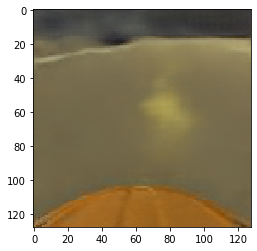

[ 0.93951505 -0.79727453 -0.49592343 -0.5956465   0.48537293  0.83110726
 -0.6830994   0.5185763   0.9652906  -0.20831084 -0.500891   -1.0990908
  0.38583842  0.47152007 -1.7002732  -0.214674   -0.38758242 -2.006859
 -1.1009741  -0.5606696   0.88630515 -0.31301296 -1.7690871  -0.29688674
  3.9500494  -1.0070493   0.05061359 -1.654762   -0.32262132 -0.9836456
  0.07920602  0.75937045  1.8743156   1.2939876  -0.26313332 -0.5825577
  1.9650259  -1.0639493  -0.39337736 -0.12075825  1.4116163   1.3960749
 -0.14980918 -0.4180328  -0.35836968  1.4054097   0.34685373  0.03037137
 -0.15074062 -0.5056022  -0.8360755   1.2257212   0.52916515  0.85586494
  0.7559348   0.9284071   1.6230458  -0.9706676   1.3483727   0.09603527
  0.16571794  0.06864877  0.2905197  -1.1318632 ]


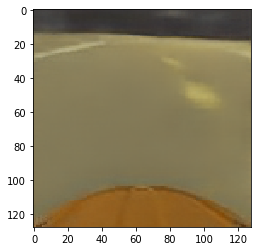

[ 1.0126632e+00  4.1076374e-01  5.7529014e-02 -4.3164188e-01
  1.2665193e+00  5.9415507e-01 -4.0624195e-01  2.0073624e+00
  6.8785489e-01  7.7346325e-01 -6.8267423e-01 -7.8270274e-01
  7.2257733e-01  4.1644171e-01 -2.5446031e+00 -6.5162055e-02
 -1.1339293e+00 -2.1469650e+00 -1.1075802e+00 -1.6565766e+00
  1.1000657e-01 -1.1106397e-01 -2.3269525e+00 -3.5327333e-01
  3.9174933e+00  2.1323304e-01  3.1566173e-01 -1.9220834e+00
  7.3830539e-01 -6.6982371e-01  2.8863925e-01  1.6066995e-01
  2.4036331e+00 -1.7883953e-01 -7.2489345e-01  5.3100073e-01
  2.8920441e+00  2.2631958e-03  3.3291683e-01 -2.3273410e-01
  2.2549903e+00  1.5813266e+00  6.5037435e-01 -4.6539077e-01
  7.6114649e-01  7.5975502e-01 -3.9831948e-01  2.4033523e-01
  9.9992377e-01 -1.4287057e+00  4.1122749e-02  2.7597147e-01
 -1.2428236e+00  8.9088404e-01 -2.7971315e-01  3.2398301e-01
  1.1559502e+00 -4.0011880e-01  1.7795221e+00 -2.4963412e-01
  7.8250378e-02 -1.2064958e+00 -1.5853336e+00 -1.3237728e-01]


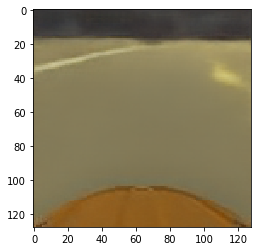

[ 1.7009715  -1.7603004  -1.4170455  -0.6756517  -0.61129653  0.9868511
  0.5477376   0.55130136  0.9716658   0.45518696 -1.594394   -0.6080398
 -0.16283621 -0.513526   -1.5143756  -1.6757334  -0.389662   -2.199443
 -1.4539566  -0.32475525  0.10715772  0.3613891  -1.2037108  -1.6828632
  4.9369373   0.02720364 -1.2120372  -0.22811414 -0.71534806 -1.6289804
  0.81722796  2.091573    2.2612102   1.4049966  -0.8957239  -0.3872257
  1.3525906  -1.5138941  -0.16642874 -2.6033409   0.23845637  1.953947
  0.4846204   0.5431397   0.1141248   0.718918    1.151081    0.22682878
  0.21161316  0.19462472  0.44053817 -0.12794611 -1.1169313   1.85041
 -0.4755292   0.4754938   1.924436    0.14358506  1.7081121  -0.37657273
  0.72599256 -0.64143974  0.22622056 -1.885344  ]


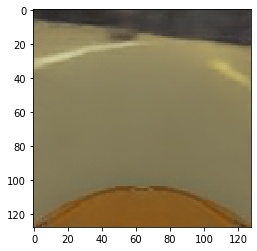

[ 0.5213744   2.100791    0.11136068  0.7639505  -1.0024896   0.4982012
  0.05002402  1.3145963   0.07398379  0.25008056 -0.3925355  -0.74009657
 -0.18378283  2.6240609  -2.3126357   0.5840069  -0.9552763  -1.1680508
  0.30661705 -1.4189639  -0.66710263 -1.1086477  -1.938968   -0.8218643
  6.1760855   0.01892712 -0.07700406 -1.0224767   0.6479474  -0.6656489
 -1.3070668   0.33506605  1.6984388   0.7355327  -0.21993515  0.66547227
  2.5499952   0.6723394   0.48350906  0.5880784   2.7451727  -1.1777755
  1.1969397  -0.3109884  -0.34997064 -0.81165874 -1.131296    0.6938719
 -0.3613111  -2.046383    0.9574274   0.1096645  -1.3462037   0.9276521
  0.48693448  1.0989931   2.4378114   1.0138596   1.1880429  -0.49636802
  0.6959257  -0.83370626 -1.778291    0.15636794]


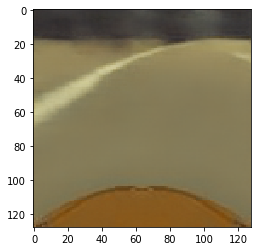

[ 1.2129778e+00  1.1336149e+00 -5.2559268e-01  4.3827295e-01
 -1.6798147e+00  7.8719372e-01  4.9071860e-01  1.3704982e+00
 -5.3684235e-02  2.8481692e-02 -7.9205197e-01 -3.7272254e-01
 -4.5781997e-01  1.1033618e+00 -2.0525763e+00 -2.3733282e-01
 -1.3144394e+00 -1.2221066e+00  3.6787349e-01 -1.1682945e+00
 -1.9325978e-01 -6.4737952e-01 -1.5543492e+00 -1.1139136e-01
  5.7506132e+00 -3.1767532e-01 -5.5357808e-01  3.4982416e-01
 -1.7812634e-02 -1.5970169e+00 -3.1195056e-01  1.4852442e+00
  1.7411141e+00  9.3689299e-01 -8.8961124e-03 -4.8109809e-01
  2.4768240e+00  2.3900494e-03  3.9350063e-01 -1.2043735e+00
  2.3687549e+00 -8.0233270e-01  5.6566381e-01 -4.6935341e-01
 -6.2102747e-01 -9.3632376e-01 -2.6278001e-01  5.1745093e-01
 -8.8725817e-01 -9.1297573e-01  8.2943135e-01  3.0901355e-01
 -1.9803721e+00  1.6134341e+00  1.9640452e-01  8.8322359e-01
  2.2379735e+00  1.7078114e+00  1.0765696e+00 -6.9372684e-01
  1.4175669e+00 -5.5000824e-01 -1.4842031e+00 -1.2971939e-01]


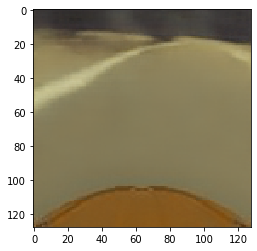

[ 0.11032162  0.7742     -0.7682811  -1.0541211  -0.66061854  1.5465112
  0.06125739  0.49057418  0.69037825  0.8237574  -1.8561399  -0.5863964
 -0.04405846  1.811706   -2.0170202   0.35956943 -0.7062512   0.23934105
 -0.93686545 -2.0937293   1.1391461  -0.33160794 -0.17252207  0.3444044
  3.9049544  -0.3337227  -0.05180784 -1.8702983   0.51475716  0.95302624
 -0.56459856 -0.0918833   1.023005    0.02096044 -0.8457201  -0.01721153
  2.6451516  -0.09426505 -0.4333887   0.36640078  3.7700691  -0.5098415
  1.1514306   0.04388048  0.5064292  -0.68286973 -1.5810065   1.269599
  0.7857112  -2.1234152   0.32139748  0.6515241  -0.7742595   1.4627799
 -1.4558396   0.6251288   0.56863385  0.21255401  0.17983806  0.40804318
  3.4605083  -1.2969759  -1.3470101  -0.6303158 ]


KeyboardInterrupt: 

In [12]:
for img, z in zip(*[X_reco, Z]):
    print(torch2numpy(z))
    plt.imshow(torch2numpy(img.permute(1, 2, 0)))
    plt.show()